# Tarea - Programación lineal

### Diseño de la Dieta Óptima

Se quiere producir comida para gatos de la manera más barata, no obstante se debe también asegurar que se cumplan los datos requeridos de analisis nutricional. Por lo que se quiere variar la cantidad de cada ingrediente para cumplir con los estandares nutricionales. Los requisitos que se tienen es que en $100$ gramos, se deben tener **por lo menos** $8$ gramos de proteína y $6$ gramos de grasa. Así mismo, no se debe tener más de $2$ gramos de fibra y $0.4$ gramos de sal.  

Los datos nutricionales se pueden obtener de la siguiente tabla:

Ingrediente|Proteína|Grasa|Fibra|Sal
:----|----|----|----|----
Pollo|  10.0%|08.0%|00.1%|00.2%
Carne|  20.0%|10.0%|00.5%|00.5%
Cordero|15.0%|11.0%|00.5%|00.7%
Arroz|  00.0%|01.0%|10.0%|00.2%
Trigo|  04.0%|01.0%|15.0%|00.8%
Gel|    00.0%|00.0%|00.0%|00.0%

Los costos de cada producto son:

Ingrediente|Costo por gramo
:----|----
Pollo|$\$$0.013
Carne|$\$$0.008
Cordero|$\$$0.010
Arroz|$\$$0.002
Trigo|$\$$0.005
Gel|$\$$0.001    

Lo que se busca optimizar en este caso es la cantidad de productos que se debe utilizar en la comida de gato, minimizando el costo total. Para simplificar la notación use las siguientes variables: 

+ $x_1:$ Gramos de pollo  
+ $x_2:$ Gramos de carne  
+ $x_3:$ Gramos de cordero  
+ $x_4:$ Gramos de arroz  
+ $x_5:$ Gramos de trigo  
+ $x_6:$ Gramos de gel

La tarea consiste en plantear el problemade programación lineal que permita satisfacer las necesidades alimenticias del gato al tiempo que minimice el costo total y resolverlo con `linprog`.

1. Definir criterio de optimizacion
    - Minimizar
2. Variables que afectan la funcion de costo
    - $p$, $c$, $cor$, $a$, $t$, $g$
3. Funcion de costo
    - $f(p, c, cor, a, t, g) = 0.013p + 0.008c + 0.010cor + 0.002a + 0.005t+ 0.001g$
4. Restricciones
    - $ .50a + b <= 10$
    - $ a + b <= 15$

In [7]:
import scipy.optimize as opt
import numpy as np

c = np.array([0.013,
             0.008,
             0.010,
             0.002,
             0.005,
             0.001])

Aub = np.array([[1, 1, 1, 1, 1], 
               [0.1, 0.2, 0.15, 0, 0.04, 0],
                [0.08, 0.1, 0.11, 0.01, 0.01, 0],
                [0.001, 0.005, 0.005, 0.1, 0.15, 0],
                [0.002, 0.005, 0.007, 0.002, 0.008, 0]
               ])

bub = np.array([100,
                0.08,
               0.06,
               0.02,
               0.004])
opt.linprog(c, Aub, bub)

C:\Users\kevin\AppData\Local\Temp\ipykernel_31496\504519133.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Aub = np.array([[1, 1, 1, 1, 1],


TypeError: Invalid input for linprog: A_ub must be a 2-D array of numerical values

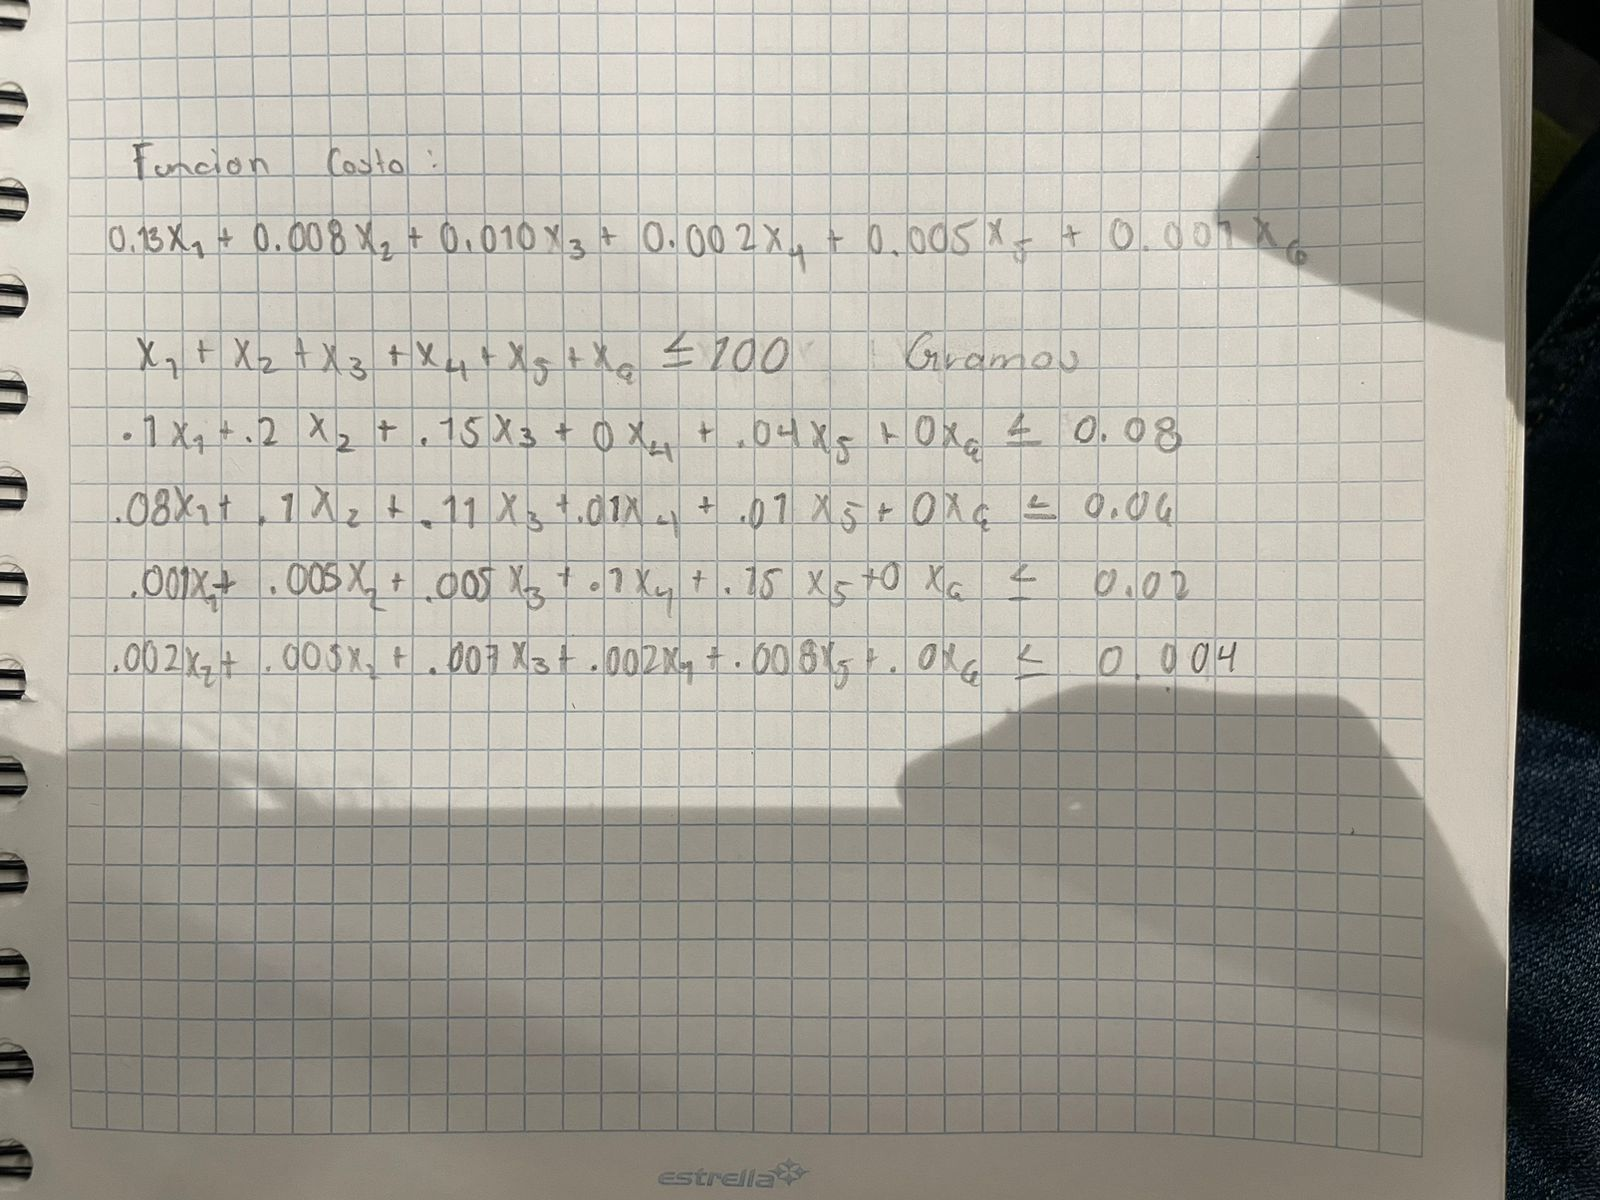

### Problema de distribución de energía eléctrica

La Comisión Federal de Electricidad **(CFE)** dispone de cuatro plantas de generación para satisfacer la demanda diaria eléctrica en cuatro ciudades, Guadalajara, León y Morelia. Las plantas $1$, $2$ y $3$ pueden satisfacer $80$, $40$ y $60$ millones de KW al día respectivamente. Las necesidades de las ciudades de Guadalajara, León y Morelia son de $70$, $40$ y $70$ millones de Kw al día respectivamente. 


Los costos asociados al envío de suministro energético por cada millón de Kw entre cada planta y cada ciudad son los registrados en la siguiente tabla. 

-|Guadalajara|León|Morelia
:----|----|----|----
Planta 1|5|2|7
Planta 2|3|6|6
Planta 3|6|1|2

Y por último, las restricciones del problema, van a estar dadas por las capacidades de oferta y demanda de cada planta (en millones de KW) y cada ciudad.

Para simplificar la notación use las siguientes variables:

+ $x_1$: Kw (en millones) distribuidos de la Planta 1 a Guadalajara
+ $x_2$: Kw (en millones) distribuidos de la Planta 1 a León
+ $x_3$: Kw (en millones) distribuidos de la Planta 1 a Morelia
+ $x_4$: Kw (en millones) distribuidos de la Planta 2 a Guadalajara
+ $x_5$: Kw (en millones) distribuidos de la Planta 2 a León
+ $x_6$: Kw (en millones) distribuidos de la Planta 2 a Morelia
+ $x_7$: Kw (en millones) distribuidos de la Planta 3 a Guadalajara
+ $x_8$: Kw (en millones) distribuidos de la Planta 3 a León
+ $x_9$: Kw (en millones) distribuidos de la Planta 3 a Morelia

La tarea consiste en plantear el problema de programación lineal que permita satisfacer las necesidades de todas las ciudades al tiempo que minimice los costos asociados a la distribución y resolverlo con `linprog`.